In [1]:
install.packages("sparklyr")

Installing package into 'C:/Users/David Li/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'tidyselect', 'plogr', 'config', 'DBI', 'dplyr', 'dbplyr', 'forge', 'generics', 'r2d3', 'rappdirs', 'tidyr'




package 'tidyselect' successfully unpacked and MD5 sums checked
package 'plogr' successfully unpacked and MD5 sums checked
package 'config' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'dbplyr' successfully unpacked and MD5 sums checked
package 'forge' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'r2d3' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'sparklyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\David Li\AppData\Local\Temp\Rtmp0WPJy2\downloaded_packages


In [12]:
packageVersion("sparklyr")

[1] ‘1.3.0’

In [13]:
library(sparklyr)
library(dplyr)


In [14]:
getRversion()

[1] ‘3.6.1’

In [15]:
library(rlang)

In [16]:
spark_available_versions()

spark
<chr>
1.6
2.0
2.1
2.2
2.3
2.4
3.0


In [17]:
system("java -version")  #wrong result on my machine. You should get the java version.

In [18]:
spark_install("3.0.0")

In [8]:
?spark_install

In [19]:
spark_install_dir()

[1] "/Users/wyp/spark"

In [20]:
spark_installed_versions()

spark,hadoop,dir
<chr>,<chr>,<chr>
2.4.5,2.7,/Users/wyp/spark/spark-2.4.5-bin-hadoop2.7
3.0.0,2.7,/Users/wyp/spark/spark-3.0.0-bin-hadoop2.7


* Running Spark on Windows requires the Microsoft Visual C++ 2010 SP1 Redistributable Package. Please download and install from: 

  https://www.microsoft.com/download/en/details.aspx?id=13523

    Then restart R after the installation completes


* To run Spark on Windows you need a copy of Hadoop winutils.exe:

    1. Download Hadoop winutils.exe from:

    https://github.com/steveloughran/winutils/raw/master/hadoop-2.6.0/bin/ (I think it should be 2.7 here)

    2. Copy winutils.exe to C:\Users\David Li\AppData\Local\spark\spark-2.3.3-bin-hadoop2.7\tmp\hadoop\bin

    Alternatively, if you are using RStudio you can install the RStudio Preview Release,
    which includes an embedded copy of Hadoop winutils.exe:
    https://www.rstudio.com/products/rstudio/download/preview/

In [32]:
# sc <- spark_connect(master = "local", spark_home="C:/spark-2.4.4-bin-hadoop2.7")

In [21]:
sc <- spark_connect(master = "local")

Re-using existing Spark connection to local



In [22]:
cars <- copy_to(sc, mtcars)

In [23]:
cars

# Source: spark<mtcars> [?? x 11]
     mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3  22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6  18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7  14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8  24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9  22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10  19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# … with more rows

In [15]:
spark_web(sc)

In [16]:
library(DBI)
dbGetQuery(sc, "SELECT count(*) FROM mtcars")

count(1)
<dbl>
32



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




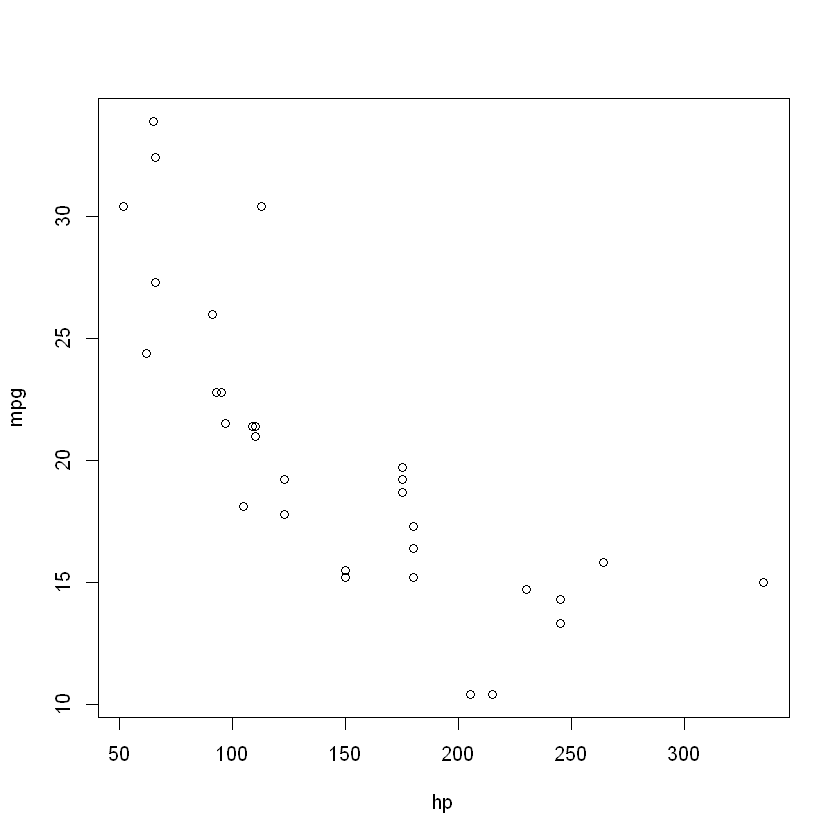

In [17]:
library(dplyr)

select(cars, hp, mpg) %>%
  sample_n(100) %>%
  collect() %>%
  plot()

In [26]:
model <- ml_linear_regression(cars, mpg ~ hp)
model

Formula: mpg ~ hp

Coefficients:
(Intercept)          hp 
30.09886054 -0.06822828 

Joining, by = c("hp", "mpg")



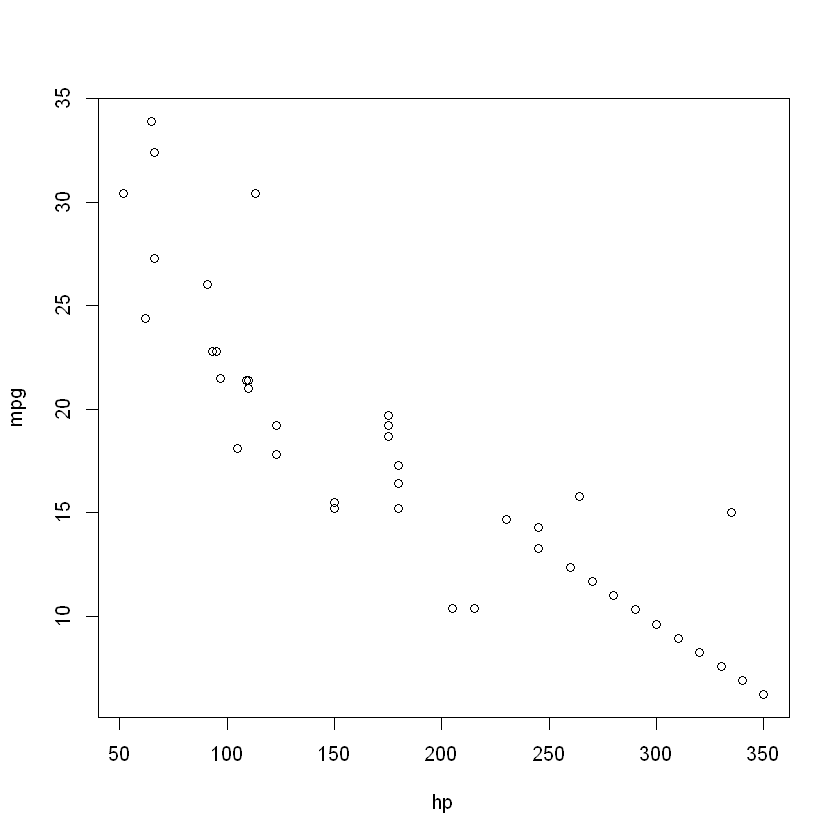

In [28]:
model %>%
  ml_predict(copy_to(sc, data.frame(hp = 250 + 10 * 1:10))) %>%
  transmute(hp = hp, mpg = prediction) %>%
  full_join(select(cars, hp, mpg)) %>%
  collect() %>%
  plot()

In [32]:
install.packages(c("nycflights13", "Lahman"))

Installing packages into 'C:/Users/David Li/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'nycflights13' successfully unpacked and MD5 sums checked
package 'Lahman' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\David Li\AppData\Local\Temp\RtmpmI1zQQ\downloaded_packages


In [33]:
flights_tbl <- copy_to(sc, nycflights13::flights, "flights")

In [34]:
flights_tbl %>% filter(dep_delay == 2)

# Source: spark<?> [?? x 19]
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      542            540         2      923            850
 3  2013     1     1      702            700         2     1058           1014
 4  2013     1     1      715            713         2      911            850
 5  2013     1     1      752            750         2     1025           1029
 6  2013     1     1      917            915         2     1206           1211
 7  2013     1     1      932            930         2     1219           1225
 8  2013     1     1     1028           1026         2     1350           1339
 9  2013     1     1     1042           1040         2     1325           1326
10  2013     1     1     1231           1229         2     1523           1529
# ... with more rows, a

In [35]:
iris_tbl = copy_to(sc, iris, overwrite=TRUE)

In [36]:
iris_tbl

# Source: spark<iris> [?? x 5]
   Sepal_Length Sepal_Width Petal_Length Petal_Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <chr>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# ... with more rows

In [39]:
class(iris_tbl)

[1] "tbl_spark" "tbl_sql"   "tbl_lazy"  "tbl"

In [41]:
typeof(iris_tbl)

[1] "list"

In [42]:
library(dplyr)

In [43]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [54]:
cars

# Source: spark<mtcars> [?? x 11]
     mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3  22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6  18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7  14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8  24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9  22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10  19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ... with more rows

In [45]:
class(cars)

[1] "tbl_spark" "tbl_sql"   "tbl_lazy"  "tbl"

In [46]:
typeof(cars)

[1] "list"

In [48]:
count(cars)

# Source: spark<?> [?? x 1]
      n
  <dbl>
1    32

In [18]:
select(cars, hp, mpg) %>% collect()

hp,mpg
<dbl>,<dbl>
110,21.0
110,21.0
93,22.8
110,21.4
175,18.7
105,18.1
245,14.3
62,24.4
95,22.8


In [53]:
class(mtcars)

[1] "data.frame"

In [57]:
library(rlang)

In [21]:
cars %>% spark_apply(function(x)(x*1000))

# Source: spark<?> [?? x 11]
     mpg   cyl   disp     hp  drat    wt  qsec    vs    am  gear  carb
   <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 21000  6000 160000 110000  3900  2620 16460     0  1000  4000  4000
 2 21000  6000 160000 110000  3900  2875 17020     0  1000  4000  4000
 3 22800  4000 108000  93000  3850  2320 18610  1000  1000  4000  1000
 4 21400  6000 258000 110000  3080  3215 19440  1000     0  3000  1000
 5 18700  8000 360000 175000  3150  3440 17020     0     0  3000  2000
 6 18100  6000 225000 105000  2760  3460 20220  1000     0  3000  1000
 7 14300  8000 360000 245000  3210  3570 15840     0     0  3000  4000
 8 24400  4000 146700  62000  3690  3190 20000  1000     0  4000  2000
 9 22800  4000 140800  95000  3920  3150 22900  1000     0  4000  2000
10 19200  6000 167600 123000  3920  3440 18300  1000     0  4000  4000
# ... with more rows

#### if you see the below error,  it could be Rscript not in PATH

Error: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 60.0 failed 1 times, most recent failure: Lost task 0.0 in stage 60.0 (TID 67, localhost, executor driver): java.io.IOException: Cannot run program "Rscript" (in directory "C:\Users\David Li\AppData\Local\spark\spark-2.4.4-bin-hadoop2.7\tmp\local\spark-1b019f39-8deb-46a6-8c54-3f259878d2c4\userFiles-25d1df40-3f25-4da4-84f5-d4f96cbcf16a"): CreateProcess error=2, <U+7CFB><U+7EDF><U+627E><U+4E0D><U+5230><U+6307><U+5B9A><U+7684><U+6587><U+4EF6><U+3002>


#### set PATH=C:\Program Files\R\R-3.6.2\bin;%PATH%

In [23]:
mtcars*1000

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21000,6000,160000,110000,3900,2620,16460,0,1000,4000,4000
Mazda RX4 Wag,21000,6000,160000,110000,3900,2875,17020,0,1000,4000,4000
Datsun 710,22800,4000,108000,93000,3850,2320,18610,1000,1000,4000,1000
Hornet 4 Drive,21400,6000,258000,110000,3080,3215,19440,1000,0,3000,1000
Hornet Sportabout,18700,8000,360000,175000,3150,3440,17020,0,0,3000,2000
Valiant,18100,6000,225000,105000,2760,3460,20220,1000,0,3000,1000
Duster 360,14300,8000,360000,245000,3210,3570,15840,0,0,3000,4000
Merc 240D,24400,4000,146700,62000,3690,3190,20000,1000,0,4000,2000
Merc 230,22800,4000,140800,95000,3920,3150,22900,1000,0,4000,2000


In [25]:
cars %>% spark_apply(~.x*1000)

# Source: spark<?> [?? x 11]
     mpg   cyl   disp     hp  drat    wt  qsec    vs    am  gear  carb
   <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 21000  6000 160000 110000  3900  2620 16460     0  1000  4000  4000
 2 21000  6000 160000 110000  3900  2875 17020     0  1000  4000  4000
 3 22800  4000 108000  93000  3850  2320 18610  1000  1000  4000  1000
 4 21400  6000 258000 110000  3080  3215 19440  1000     0  3000  1000
 5 18700  8000 360000 175000  3150  3440 17020     0     0  3000  2000
 6 18100  6000 225000 105000  2760  3460 20220  1000     0  3000  1000
 7 14300  8000 360000 245000  3210  3570 15840     0     0  3000  4000
 8 24400  4000 146700  62000  3690  3190 20000  1000     0  4000  2000
 9 22800  4000 140800  95000  3920  3150 22900  1000     0  4000  2000
10 19200  6000 167600 123000  3920  3440 18300  1000     0  4000  4000
# ... with more rows

In [27]:
data.frame(x=1:3, y=4:6)

x,y
<int>,<int>
1,4
2,5
3,6


In [28]:
copy_to(sc, data.frame(x=1:3, y=4:6)) %>% spark_apply(~ 10 * .x)

# Source: spark<?> [?? x 2]
      x     y
  <dbl> <dbl>
1    10    40
2    20    50
3    30    60

In [49]:
fx=rlang::as_function(~ 10 * .x)

In [46]:
fx(10)

[1] 100

In [47]:
fx(data.frame(x=1:3, y=4:6))

x,y
<dbl>,<dbl>
10,40
20,50
30,60


In [50]:
f=function(x)(x*10)

In [51]:
f(10)

[1] 100

In [52]:
f(data.frame(x=1:3, y=4:6))

x,y
<dbl>,<dbl>
10,40
20,50
30,60


In [42]:
copy_to(sc, data.frame(a=1:3)) %>% 
    spark_apply(function(x)(x*10)) %>%
                collect()

a
<dbl>
10
20
30


In [59]:
copy_to(sc, data.frame(a=1:3)) %>% 
    spark_apply(f) %>%
                collect()

a
<dbl>
10
20
30


In [58]:
copy_to(sc, data.frame(a=1:3)) %>% 
    spark_apply(~ .x*10) %>%
                collect()

a
<dbl>
10
20
30


In [61]:
iris <- copy_to(sc, datasets::iris)

iris %>%
  spark_apply(nrow, group_by = "Species")

# Source: spark<?> [?? x 2]
  Species    result
  <chr>       <int>
1 setosa         50
2 versicolor     50
3 virginica      50

In [66]:
copy_to(sc, data.frame(1:100), repartition =2) %>%
  spark_apply(~nrow(.x))

# Source: spark<?> [?? x 1]
  result
   <int>
1     50
2     50

In [71]:
copy_to(sc, data.frame(1:100), repartition =2) %>%
  spark_apply(~nrow(.x)) %>%
  sdf_repartition(1) %>%
  spark_apply(~sum(.x))

# Source: spark<?> [?? x 1]
  result
   <int>
1    100

In [77]:
copy_to(sc, data.frame(a=1:4), repartition=2) %>% 
    spark_apply(function(x, context) x*context, context=100)

# Source: spark<?> [?? x 1]
      a
  <dbl>
1   100
2   200
3   300
4   400

In [78]:
copy_to(sc, data.frame(a=1:4), repartition=2) %>% 
    spark_apply(function(x, context) x*context$a+context$b, 
                context=list(a=100, b=5))

# Source: spark<?> [?? x 1]
      a
  <dbl>
1   105
2   205
3   305
4   405

In [74]:
sdf_len(sc, 4) %>%
  spark_apply(
    function(data, context) context * data,
    context = 100
  )

# Source: spark<?> [?? x 1]
     id
  <dbl>
1   100
2   200
3   300
4   400

In [1]:
install.packages("ggraph")
install.packages("igraph")
install.packages("graphframes")

In [1]:
library(sparklyr)
library(dplyr)
library(ggraph)
library(igraph)
library(graphframes)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggraph' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'igraph' was built under R version 3.6.3"

Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message:
"package 'graphframes' was built under R version 3.6.3"


In [2]:
head(highschool)

,from,to,year
,<dbl>,<dbl>,<dbl>
1,1,14,1957
2,1,15,1957
3,1,21,1957
4,1,54,1957
5,1,55,1957
6,2,21,1957


In [4]:
ggraph::highschool

,from,to,year
,<dbl>,<dbl>,<dbl>
1,1,14,1957
2,1,15,1957
3,1,21,1957
4,1,54,1957
5,1,55,1957
6,2,21,1957
7,2,22,1957
8,3,9,1957
9,3,15,1957


In [3]:
Sys.setenv(JAVA_HOME="C:/Java/jre1.8.0_221") #you need to change to your path
Sys.setenv(SPARK_HOME="C:/spark-2.4.4-bin-hadoop2.7") #you need to change to your path

### if you see error
### Exception in thread "main" java.lang.RuntimeException: [unresolved dependency: graphframes#graphframes;0.6.0-spark2.4-s_2.11: not found]
### please go to http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/0.6.0-spark2.3-s_2.11/graphframes-0.6.0-spark2.3-s_2.11.jar
### rename it to graphframes.jar and then store it to 
### C:\Users\YOUR USERNAME\\.ivy2\local\graphframes\graphframes\0.6.0-spark2.4-s_2.11\jars

In [4]:
sc=spark_connect(master = "local")
highschool_tbl <- copy_to(sc, highschool, "highschool", overwrite = TRUE)

In [7]:
highschool_tbl

# Source: spark<highschool> [?? x 3]
    from    to  year
   <dbl> <dbl> <dbl>
 1     1    14  1957
 2     1    15  1957
 3     1    21  1957
 4     1    54  1957
 5     1    55  1957
 6     2    21  1957
 7     2    22  1957
 8     3     9  1957
 9     3    15  1957
10     4     5  1957
# ... with more rows

In [35]:
highschool_tbl <- copy_to(sc, 
                          highschool, 
                          "highschool", 
                          overwrite = TRUE) %>%
  filter(year == 1957) %>%
  transmute(from = as.character(as.integer(from)),
            to = as.character(as.integer(to)))

In [36]:
highschool_tbl

# Source: spark<?> [?? x 2]
   from  to   
   <chr> <chr>
 1 1     14   
 2 1     15   
 3 1     21   
 4 1     54   
 5 1     55   
 6 2     21   
 7 2     22   
 8 3     9    
 9 3     15   
10 4     5    
# ... with more rows

In [37]:
from_tbl <- highschool_tbl %>% 
    distinct(from) %>% 
    transmute(id = from)
from_tbl

# Source: spark<?> [?? x 1]
   id   
   <chr>
 1 1    
 2 3    
 3 4    
 4 8    
 5 12   
 6 17   
 7 20   
 8 27   
 9 29   
10 31   
# ... with more rows

In [38]:
to_tbl <- highschool_tbl %>% 
    distinct(to) %>% 
    transmute(id = to)
to_tbl

# Source: spark<?> [?? x 1]
   id   
   <chr>
 1 43   
 2 20   
 3 17   
 4 12   
 5 8    
 6 4    
 7 27   
 8 60   
 9 65   
10 68   
# ... with more rows

In [39]:
vertices_tbl <- distinct(sdf_bind_rows(from_tbl, to_tbl))
vertices_tbl

# Source: spark<?> [?? x 1]
   id   
   <chr>
 1 1    
 2 3    
 3 4    
 4 8    
 5 12   
 6 17   
 7 20   
 8 27   
 9 29   
10 31   
# ... with more rows

In [40]:
edges_tbl <- highschool_tbl %>% 
    transmute(src = from, dst = to)
edges_tbl

# Source: spark<?> [?? x 2]
   src   dst  
   <chr> <chr>
 1 1     14   
 2 1     15   
 3 1     21   
 4 1     54   
 5 1     55   
 6 2     21   
 7 2     22   
 8 3     9    
 9 3     15   
10 4     5    
# ... with more rows

In [58]:
filter(edges_tbl, dst==14)

# Source: spark<?> [?? x 2]
  src   dst  
  <chr> <chr>
1 1     14   
2 8     14   

In [60]:
filter(edges_tbl, src==29)
filter(edges_tbl, src==13)

# Source: spark<?> [?? x 2]
  src   dst  
  <chr> <chr>
1 29    13   
2 29    38   

# Source: spark<?> [?? x 2]
  src   dst  
  <chr> <chr>
1 13    17   
2 13    20   
3 13    21   
4 13    22   

### put scala-logging-slf4j_2.10-2.1.2.jar into C:\Java\jre1.8.0_221\lib\ext or your JAVA_HOME's same folder
### You can download this file on canvas W7 page. DO NOT download elsewhere because I modified this jar to make life easier.

In [41]:
graph <- gf_graphframe(vertices_tbl, edges_tbl)
graph

GraphFrame
Vertices:
  Database: spark_connection
  $ id <chr> "1", "3", "4", "8", "12", "17", "20", "27", "29", "31", "34", "3...
Edges:
  Database: spark_connection
  $ src <chr> "1", "1", "1", "1", "1", "2", "2", "3", "3", "4", "4", "4", "4"...
  $ dst <chr> "14", "15", "21", "54", "55", "21", "22", "9", "15", "5", "18",...

In [42]:
?gf_degrees

In [43]:
gf_degrees(graph)

# Source: spark<?> [?? x 2]
   id    degree
   <chr>  <int>
 1 1          5
 2 3          2
 3 4          5
 4 43        12
 5 20        11
 6 17         5
 7 8          3
 8 12         5
 9 27         4
10 60         7
# ... with more rows

In [44]:
gf_degrees(graph) %>% arrange(desc(degree))

# Source:     spark<?> [?? x 2]
# Ordered by: desc(degree)
   id    degree
   <chr>  <int>
 1 71        16
 2 21        14
 3 22        14
 4 70        13
 5 54        13
 6 69        12
 7 43        12
 8 66        12
 9 52        11
10 67        11
# ... with more rows

In [45]:
gf_degrees(graph) %>% summarise(friends = mean(degree, na.rm = TRUE))

# Source: spark<?> [?? x 1]
  friends
    <dbl>
1    6.94

In [56]:
gf_shortest_paths(graph, 14)

# Source: spark<?> [?? x 2]
   id    distances       
   <chr> <list>          
 1 17    <named list [1]>
 2 27    <named list [0]>
 3 29    <named list [1]>
 4 34    <named list [1]>
 5 43    <named list [0]>
 6 45    <named list [0]>
 7 47    <named list [0]>
 8 49    <named list [0]>
 9 56    <named list [0]>
10 57    <named list [0]>
# ... with more rows

In [61]:
gf_shortest_paths(graph, 14) %>%
  filter(size(distances) > 0) %>%
  mutate(distance = explode(map_values(distances))) %>%
  select(id, distance) 

# Source: spark<?> [?? x 2]
   id    distance
   <chr>    <int>
 1 17           2
 2 29           4
 3 34           6
 4 8            1
 5 13           3
 6 14           0
 7 22           6
 8 24           8
 9 28           6
10 38           7
# ... with more rows

In [63]:
gf_shortest_paths(graph, 14) %>%
    filter(size(distances) > 0) %>%
    mutate(distance = explode(map_values(distances))) %>%
    select(id, distance) %>% 
    summarise(influence = mean(distance, na.rm = TRUE))

# Source: spark<?> [?? x 1]
  influence
      <dbl>
1      4.96

In [64]:
gf_shortest_paths(graph, 33) %>%
    filter(size(distances) > 0) %>%
    mutate(distance = explode(map_values(distances))) %>%
    select(id, distance) %>% 
    summarise(influence = mean(distance, na.rm = TRUE))

# Source: spark<?> [?? x 1]
  influence
      <dbl>
1      3.33

In [54]:
?gf_shortest_paths

In [18]:
gf_graphframe(vertices_tbl, edges_tbl) %>%
  gf_pagerank(reset_prob = 0.15, max_iter = 10L)

GraphFrame
Vertices:
  Database: spark_connection
  $ id       <chr> "17", "27", "29", "34", "43", "45", "47", "49", "56", "57"...
  $ pagerank <dbl> 0.9584287, 0.2465494, 0.2567435, 0.3430992, 1.0834154, 0.8...
Edges:
  Database: spark_connection
  $ src    <chr> "1", "1", "12", "20", "20", "20", "27", "29", "3", "31", "31...
  $ dst    <chr> "15", "21", "20", "12", "21", "22", "40", "38", "15", "37", ...
  $ weight <dbl> 0.2000000, 0.2000000, 0.3333333, 0.2000000, 0.2000000, 0.200...

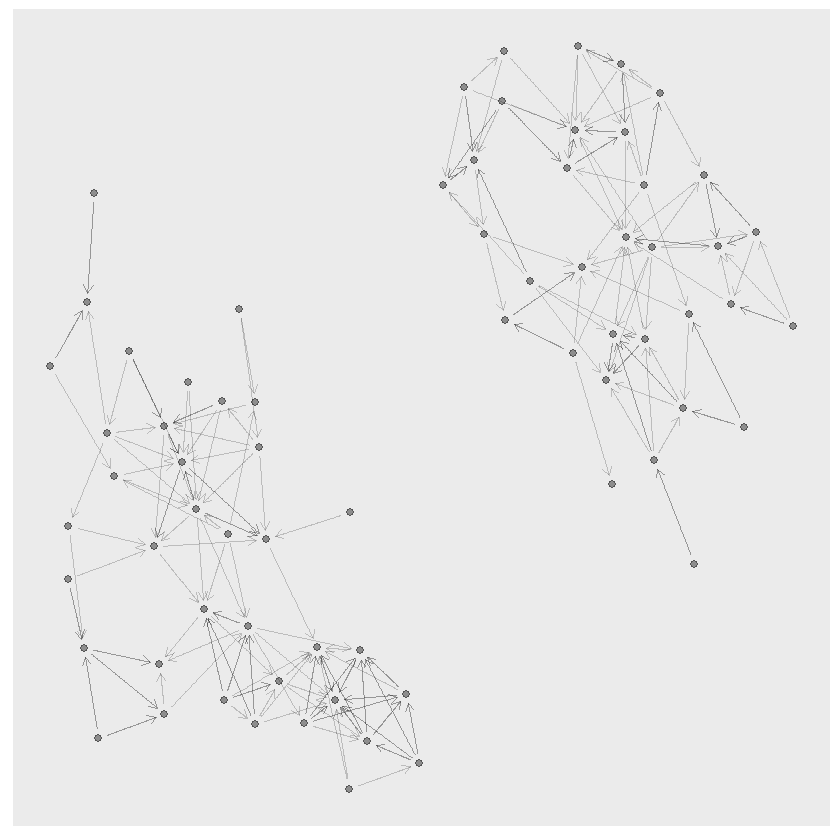

In [65]:
library(ggraph)
highschool_tbl %>%
  igraph::graph_from_data_frame(directed = FALSE) %>%
  ggraph(layout = 'kk') + 
    geom_edge_link(alpha = 0.2,
                   arrow = arrow(length = unit(2, 'mm')),
                   end_cap = circle(2, 'mm'),
                   start_cap = circle(2, 'mm')) + 
    geom_node_point(size = 2, alpha = 0.4)